## Semana 2 (Inicio del proceso EDA)

#Codigo de la semana pasada:


In [2]:
#Importando las bibliotecas a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Importando las bibliotecas a utilizar
import numpy as np
import pandas as pd


#==========CREANDO UN DF DEL ARCHIVO DE DATOS Y UN DF PROVICIONAL DE TRABAJO====================
# Creamos un DataFrame compra a partir del archivo de texto de los datos diarios de la estacion en nuestro repositorio:

url = "https://raw.githubusercontent.com/Refer-MF/Fisica-Computacional-2020-1-Gustavo-Medina/master/Actividad%201/Datos%20diarios.txt"
#La URL del archivo de datos que esta guardado en mi repositorio de GH
encabezados=['FECHA','PRECIP','EVAP','TMax','TMin'] #Encabezados de las columnas, de acuerdo al archivo que se leera


df_datclim = pd.read_csv(url, names=encabezados, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')
#El df read se declara con (url del archivo que usaras, names=como quieres que se titulen las columnas, encoding=formato del archivo que en este caso es 
#espanol, sep= la separacion de los datos en el archivo, header= (Encabezado?), skiprows=numero de renglones que quieres que se omitan del principio, skipfooter= numero de renglones que quieres que se omitan del final, engine= el motor que lo leera)


#print(df_datclim.head(10)) #Para imprimir los primeros tres renglones del df
#print(df_datclim.tail(10)) #Para imprimir los ultimos tres renglones del df
#df_datclim.shape #Para imprimir la forma del df (Renglones, columnas). Mi df tiene una forma de (24364,5) 
#df_datclim.info() #Para imprimir la informacion del df (Cuantas columnas, nombres de columnas, conteo de datos por columnas, tipo de dato)


df_datclim0=df_datclim.copy() #Creando un df con el cual trabajaremos, el otro lo mantendremos intacto
#df_datclim0.head()

str_Nulo='Nulo'
df_datclim1=df_datclim0.replace(to_replace=str_Nulo, value=' ', regex=True) #Este df no tendra ningun "Nulo" en sus casillas.
#df_datclim1.head()

#======================PASANDO LOS DATOS A NUMERICOS======================
cols_list=['PRECIP','EVAP','TMax','TMin'] #Un diccionario que usaremos para analizar el df en un loop for
for cols in cols_list:
  df_datclim1[cols]=pd.to_numeric(df_datclim1[cols], errors='coerce') #Pasando los datos en las columnas del diccionario a numerico y los que no apliquen
#seran mostrados como un 'NaN' (Eso significa 'errors='coerce'')

#df_datclim1.info() #A partir de esta informacion, vemos que a mi set de datos no le hace falta muchos. Pero para asegurarnos, contaremos los fatos faltantes.

print('\n ') #Solo para ayudar en la lectura

#=============CONTANDO LOS DATOS FALTANTES=====================
#df_datclim1.isnull().sum() #*Sumando los valores nulos. A partir de esta informacion vemos que la precipitacion no tiene ningun dato nulo, la evaporacion
#tiene la mayoria de datos nulos con 214, la temperatura maxima y la minima les faltan a los dos 5 datos. De los 70 y algo años que lleva activa la
#estacion, me parece que le falta muy pocos datos.

#df_datclim1.head()
#df_datclim1.tail()

#============ANALISIS ESTADISTICO===============
#df_datclim1.describe() #A partir de esto podemos observar que los datos no tienen ninguna incoherencia. Los datos de temperatura, en base a mi experiencia
#y mi vivencia en esta region, parecen normales, exceptuando la temperatura minima de -2 grados, ya que en la ciudad de Obregon nunca he experimentado 
#temperaturas bajo cero (sin embargo no es algo sorpresivo, ya que en epocas de invierno las temperaturas llegan hasta 6 grados centigrados).
#La precipitacion maxima es de 137.5 mm, lo cual es bastante, y se puede explicar con algun huracan o tormenta tropical.

#==============TRABAJANDO CON FECHAS===============
df_datclim2=df_datclim1.copy()
#df_datclim2['FECHA'].head() #Para imprimir solo las de la columna 'FECHA'

df_datclim2['FECHA']=pd.to_datetime(df_datclim2['FECHA'], dayfirst=True).copy() #Cambiando los datos de la columna FECHAS a fechas con el dia primero.
#df_datclim2['FECHA'].head()
df_datclim2.dtypes #Checando el tipo de dato de las columnas.

df_datclim2['Año']=df_datclim2['FECHA'].dt.year #Añadiendo una columna 'Año' al df con el año respectivo de la medida
df_datclim2['Mes']=df_datclim2['FECHA'].dt.month #Añadiendo una columna 'Mes' al df con el mes respectivo de la medida

#df_datclim2.head()
#df_datclim2.tail()

#df_datclim2.info() #Para checar que la informacion este correcta

#===============================================================================
#============FIN DE LA PRIMERA SEMANA===========================================
#===============================================================================

df_datclim3=df_datclim2.copy() #Df con el que trabajaremos en esta semana


## ACTIVIDAD SEMANA 2

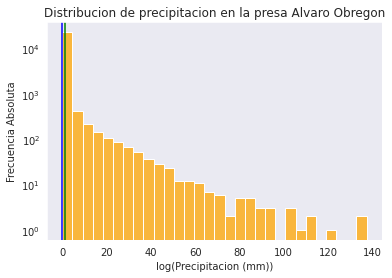

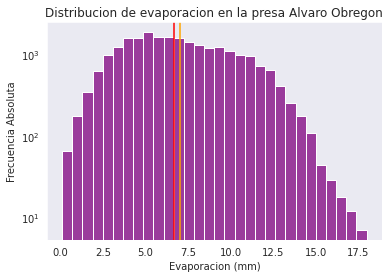

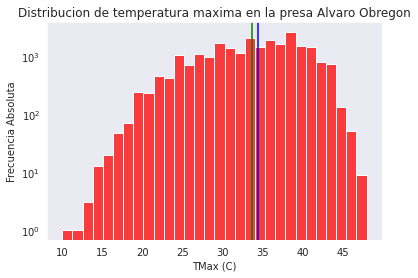

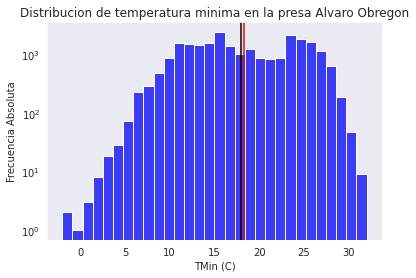

In [9]:
#Importando la bibliotecas que usaremos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#=====================ACTIVIDAD===================
#comenzamos por imprimir un histograma de la frecuencia absoluta de precipitacion del df de los datos


#-------------GRAFICANDO----------------
#plt.hist(df_datclim3.PRECIP, bins=20) #Pidiendo que grafique un histograma con los datos df_datclim3 y la columna 'PRECIP'
#plt.xlabel('Precipitacion (mm)') #Titulo del eje x
#plt.ylabel('Frecuencia absoluta') #Titulo del eje y
#plt.title('Distribucion de precipitacion en la presa Alvaro Obregon') #Titulo del grafico
#plt.grid()
#plt.show()

#A partir de esto, por la escala del histograma, no se pueden apreciar bien los datos. Por eso, cambiaremos a escala logaritmica.


#plt.hist(df_datclim3.PRECIP, bins=30)
#plt.yscale('log') #Cambiando la escala del eje y a escala logaritmica
#plt.xlabel('Precipitacion (mm)')
#plt.ylabel('log(Frecuencia absoluta)')
#plt.title('Distribucion de precipitacion en la presa Alvaro Obregon')
#plt.grid()
#plt.show()

#Se experimento con los bins del histograma, yendo hasta 1000, y se concluyo que el que hayan mas no significa que sea mejor, ya que se pierde de nuevo la precision.
#Ahora nuestros datos se pueden apreciar de mejor manera, sin embargo, ahora se debe de tener mas cuidado interpretandolos, lo cual no deberia de resultar
#en ningun problema



#==================BIBLIOTECA SEABORN=======================
#Ahora graficaremos lo mismo pero usando la notacion de la biblioteca 'Seaborn':

#----EJEMPLO 1--------
#sns.set_style('whitegrid'), plt.xlabel('Precipitacion (mm)'), plt.ylabel('Frequencia Absoluta'), plt.title('Distribución de Precipitacion en la presa Alvaro Obregon'),sns.histplot(data=df_datclim3, x='PRECIP',bins=20);

#-----EJEMPLO 2 (escala logaritmica)------
#sns.set_style('whitegrid'), plt.xlabel('Precipitacion (mm)'), plt.ylabel('Frequencia Absoluta'), plt.title('Distribución de Precipitacion en la presa Alvaro Obregon'),sns.histplot(data=df_datclim3, x='PRECIP',bins=20,log_scale=(False,True));

#=============GRAFICANDO BIEN TODAS LAS VARIABLES==============
#Ahora vamos a graficar todas las columnas del df

#-------------HISTOGRAMAS----------------

#++++++++++PRECIPITACION++++++++++++++++
sns.set_style("darkgrid")

PrecMedi=df_datclim3.PRECIP.median()
PrecMean=df_datclim3.PRECIP.mean()

sns.histplot(df_datclim3['PRECIP'],kde=False,color='orange', bins=30,log_scale=(False,True))


plt.axvline(x=PrecMedi,color='b',label='Mediana')
plt.axvline(x=PrecMean,color='g',label='Media')

plt.title('Distribucion de precipitacion en la presa Alvaro Obregon')
plt.xlabel('log(Precipitacion (mm))')
plt.ylabel('Frecuencia Absoluta')
plt.grid()
plt.show()

#++++++++++++EVAPORACION+++++++++++++++++++++
sns.set_style("darkgrid")

EvaMedi=df_datclim3.EVAP.median()
EvaMean=df_datclim3.EVAP.mean()

sns.histplot(df_datclim3['EVAP'],kde=False,color='purple', bins=30,log_scale=(False,True))

plt.axvline(x=EvaMedi,color='red',label='Mediana')
plt.axvline(x=EvaMean,color='orange',label='Media')

plt.title('Distribucion de evaporacion en la presa Alvaro Obregon')

plt.xlabel('Evaporacion (mm)')
plt.ylabel('Frecuencia Absoluta')
plt.grid()
plt.show()

#+++++++++++TEMP MAX+++++++++++++++++++++
sns.set_style("darkgrid")

TmaxMedi=df_datclim3.TMax.median()
TmaxMean=df_datclim3.TMax.mean()

sns.histplot(df_datclim3['TMax'],kde=False,color='red', bins=30,log_scale=(False,True))

plt.axvline(x=TmaxMedi,color='blue',label='Mediana')
plt.axvline(x=TmaxMean,color='green',label='Media')


plt.title('Distribucion de temperatura maxima en la presa Alvaro Obregon')

plt.xlabel('TMax (C)')
plt.ylabel('Frecuencia Absoluta')
plt.grid()
plt.show()

#++++++++++++TEMP MIN+++++++++++++++++++++
sns.set_style("darkgrid")

TminMedi=df_datclim3.TMin.median()
TminMean=df_datclim3.TMin.mean()

sns.histplot(df_datclim3['TMin'],kde=False,color='blue', bins=30,log_scale=(False,True))

plt.axvline(x=TminMedi,color='black',label='Mediana')
plt.axvline(x=TminMean,color='red',label='Media')

plt.title('Distribucion de temperatura minima en la presa Alvaro Obregon')

plt.xlabel('TMin (C)')
plt.ylabel('Frecuencia Absoluta')
plt.grid()
plt.show()





#$\underline{\text{Graficas de distribucion acumulada y normalizadas}}$

Ahora vamos a graficar las mismas variables (Precipitacion, Evaporacion, Temperatura maxima y Temperatura minima) del set de datos de la presa Alvaro Obregon, en graficas de distribucion acumulada y normalizadas, al igual que junto con los histogramas de los datos.

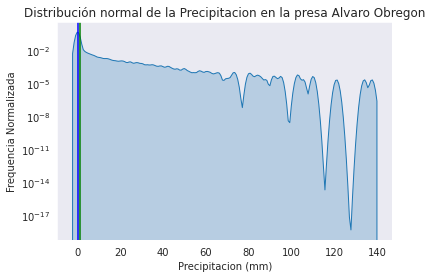

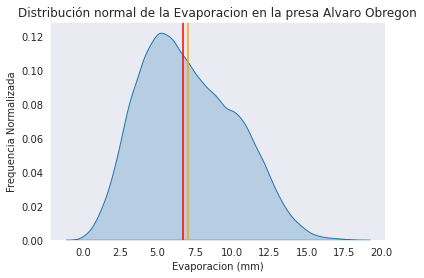

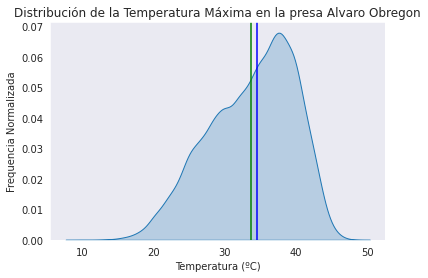

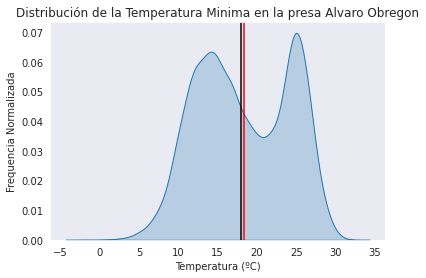

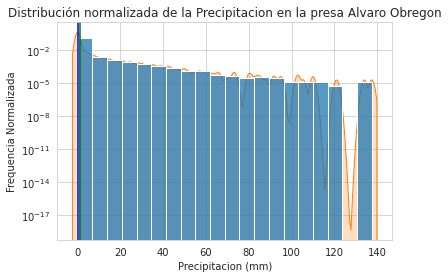

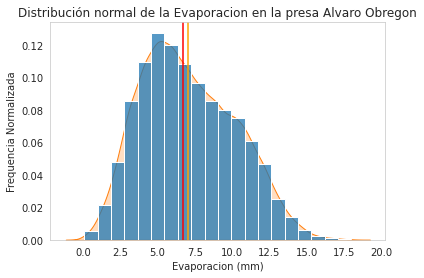

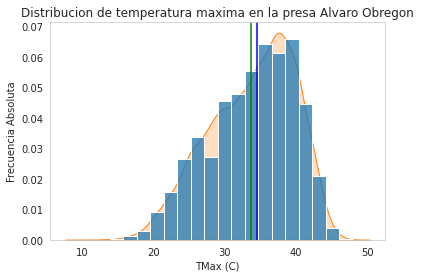

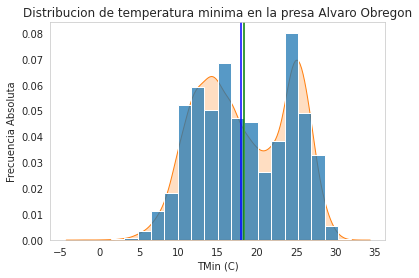

In [10]:
#-------FUNCION DE DENSIDAD DE PROBABILIDAD---------------
#Ahora graficamos lo mismo pero con la funciond e densidad de probabilidad junto con cada grafico correspondiente

#++++++++++PRECIPITACION++++++++++++++++
sns.kdeplot(df_datclim3['PRECIP'],fill=True,log_scale=(False,True))

plt.axvline(x=PrecMedi,color='b',label='Mediana')
plt.axvline(x=PrecMean,color='g',label='Media')

plt.xlabel('Precipitacion (mm)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución normal de la Precipitacion en la presa Alvaro Obregon')
plt.grid()
plt.show()

#++++++++++++EVAPORACION+++++++++++++++++++++
sns.kdeplot(df_datclim3['EVAP'],fill=True)

plt.axvline(x=EvaMedi,color='red',label='Mediana')
plt.axvline(x=EvaMean,color='orange',label='Media')
plt.xlabel('Evaporacion (mm)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución normal de la Evaporacion en la presa Alvaro Obregon')
plt.grid()
plt.show()

#+++++++++++TEMP MAX+++++++++++++++++++++
sns.kdeplot(df_datclim3['TMax'],fill=True)

plt.axvline(x=TmaxMedi,color='blue',label='Mediana')
plt.axvline(x=TmaxMean,color='green',label='Media')
plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en la presa Alvaro Obregon')
plt.grid()
plt.show()

#++++++++++++TEMP MIN+++++++++++++++++++++
sns.kdeplot(df_datclim3['TMin'],fill=True)

plt.axvline(x=TminMedi,color='black',label='Mediana')
plt.axvline(x=TminMean,color='red',label='Media')
plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Minima en la presa Alvaro Obregon')
plt.grid()
plt.show()

#En Temp minima podemos apreciar una "casi" distribucion bimodal (analisis en el reporte)

#=================GRAFICANDO LAS DOS GRAFICAS JUNTAS===========================
#++++++++++++++++++PRECIPITACION+++++++++++++++++++++++++++++++++++++++++++++++
sns.set_style("whitegrid")

sns.histplot(data=df_datclim3, x='PRECIP', bins=20, stat='density');
sns.kdeplot(df_datclim3.PRECIP, fill=True,log_scale=(False,True));

plt.axvline(x=PrecMedi,color='b',label='Mediana')
plt.axvline(x=PrecMean,color='g',label='Media')

plt.xlabel('Precipitacion (mm)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución normalizada de la Precipitacion en la presa Alvaro Obregon')

plt.show()

#++++++++++++++++++EVAPORACION+++++++++++++++++++++++++++++++++++++++++++++++
sns.set_style("whitegrid")

sns.histplot(data=df_datclim3, x='EVAP', bins=20, stat='density');
sns.kdeplot(df_datclim3.EVAP, fill=True);

plt.axvline(x=EvaMedi,color='red',label='Mediana')
plt.axvline(x=EvaMean,color='orange',label='Media')
plt.xlabel('Evaporacion (mm)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución normal de la Evaporacion en la presa Alvaro Obregon')
plt.grid()
plt.show()

#++++++++++++++++++TEMPERATURA MAXIMA+++++++++++++++++++++++++++++++++++++++++++++++
sns.set_style("whitegrid")

sns.histplot(data=df_datclim3, x='TMax', bins=20, stat='density');
sns.kdeplot(df_datclim3.TMax, fill=True);

plt.axvline(x=TmaxMedi,color='blue',label='Mediana')
plt.axvline(x=TmaxMean,color='green',label='Media')

plt.title('Distribucion de temperatura maxima en la presa Alvaro Obregon')
#plt.yscale('log')
plt.xlabel('TMax (C)')
plt.ylabel('Frecuencia Absoluta')
plt.grid()
plt.show()

#++++++++++++++++++TEMPERATURA MINIMA+++++++++++++++++++++++++++++++++++++++++++++++
sns.set_style("whitegrid")

sns.histplot(data=df_datclim3, x='TMin', bins=20, stat='density');
sns.kdeplot(df_datclim3.TMin, fill=True);

plt.axvline(x=TminMedi,color='blue',label='Mediana')
plt.axvline(x=TminMean,color='green',label='Media')

plt.title('Distribucion de temperatura minima en la presa Alvaro Obregon')
#plt.yscale('log')
plt.xlabel('TMin (C)')
plt.ylabel('Frecuencia Absoluta')
plt.grid()
plt.show()

# $\underline{\text{Graficas de Caja (Boxplots)}}$

Ahora vamos a graficar las mismas variables (Precipitacion, Evaporacion, Temperatura maxima y Temperatura minima) del set de datos de la presa Alvaro Obregon, en graficas de cajas.

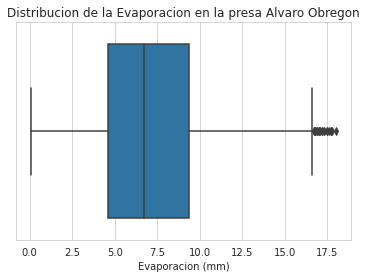

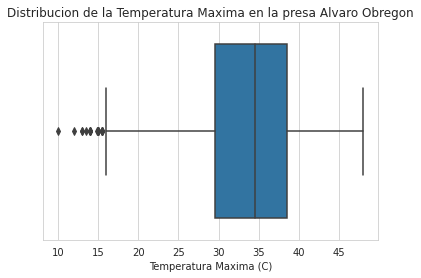

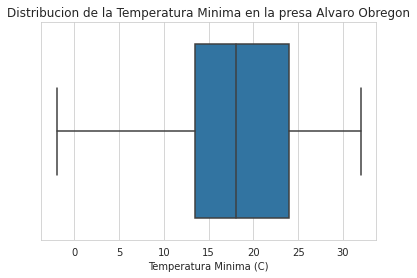

In [ ]:
#=================BOXPLOT=================
#Ahora graficaremos las de caja (o bigotes) para los mismos cuatro tipos de datos 

#--------EVAPORACION-------------------
sns.set_style('whitegrid')
sns.boxplot(x=df_datclim3.EVAP,data=df_datclim3,orient='h').set(xlabel='Evaporacion (mm)',title='Distribucion de la Evaporacion en la presa Alvaro Obregon');
plt.show()
#---------TEMPERATURA MAXIMA------------
sns.set_style('whitegrid')
sns.boxplot(x=df_datclim3.TMax,data=df_datclim3,orient='h').set(xlabel='Temperatura Maxima (C)',title='Distribucion de la Temperatura Maxima en la presa Alvaro Obregon');
plt.show()
#----------TEMPERATURA MINIMA------------
sns.set_style('whitegrid')
sns.boxplot(x=df_datclim3.TMin,data=df_datclim3,orient='h').set(xlabel='Temperatura Minima (C)',title='Distribucion de la Temperatura Minima en la presa Alvaro Obregon');
plt.show()


# $\underline{\text{Analizando periodos de datos}}$

Ahora vamos a analizar las mismas variables, pero esta vez a lo largo de periodos, dandonos una idea del comportamiento de la variable a traves del tiempo.

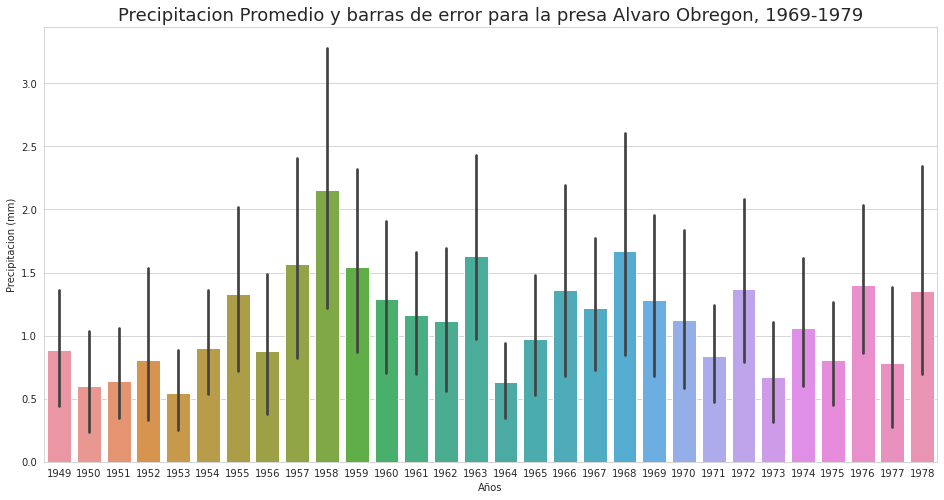

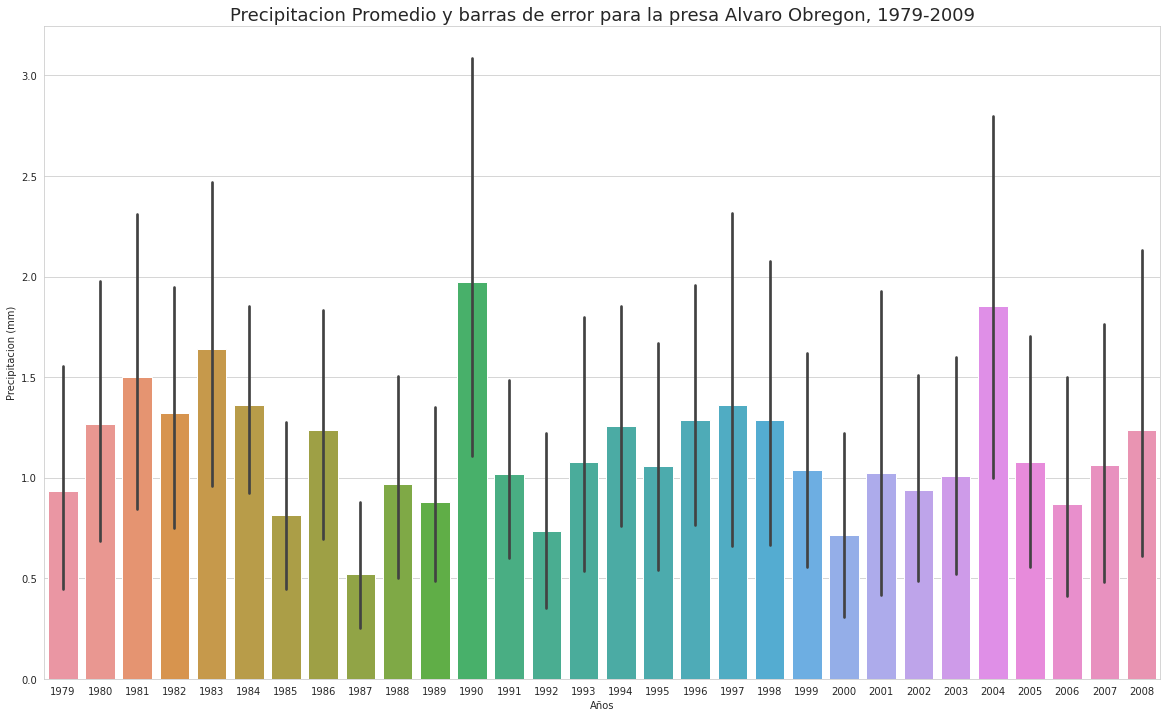

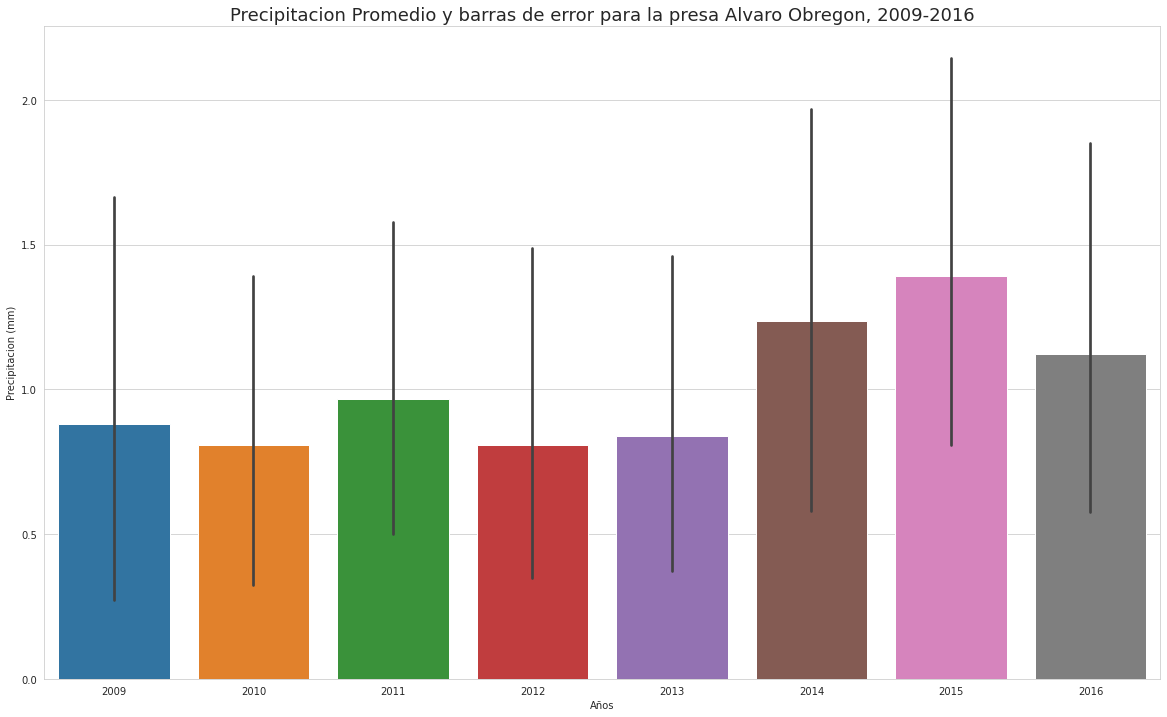

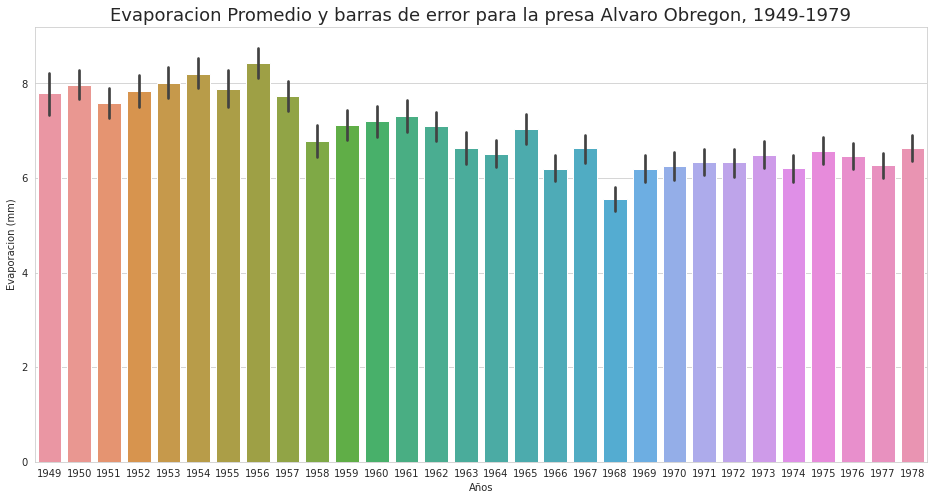

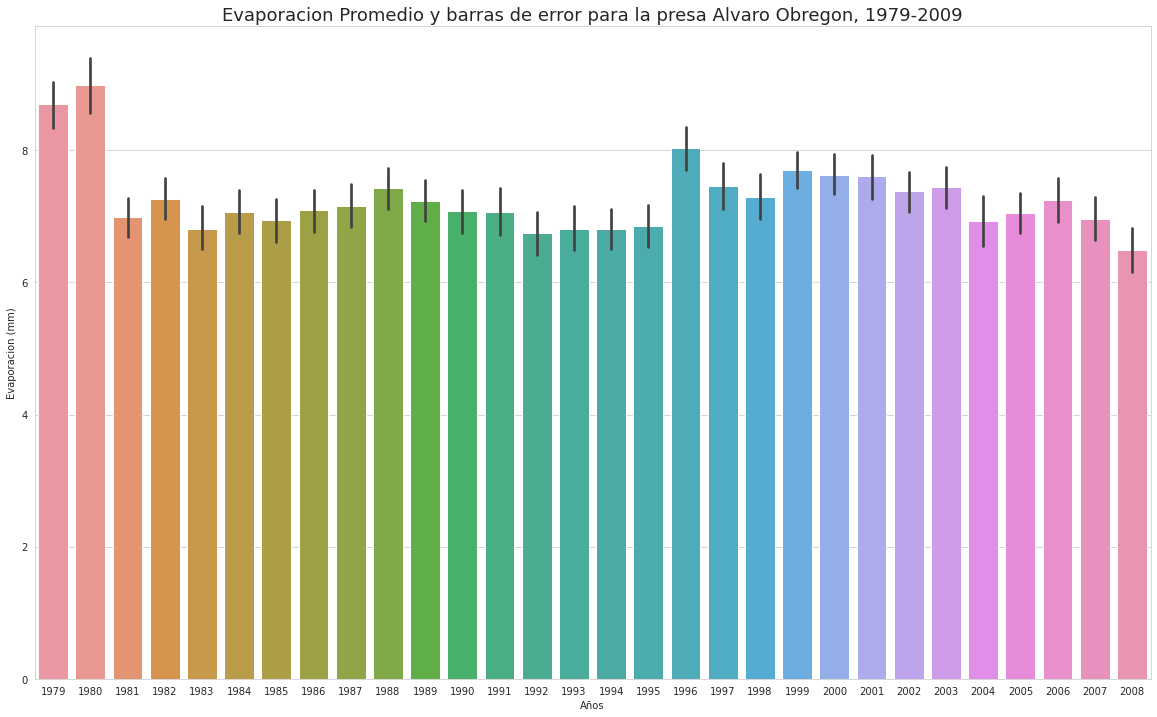

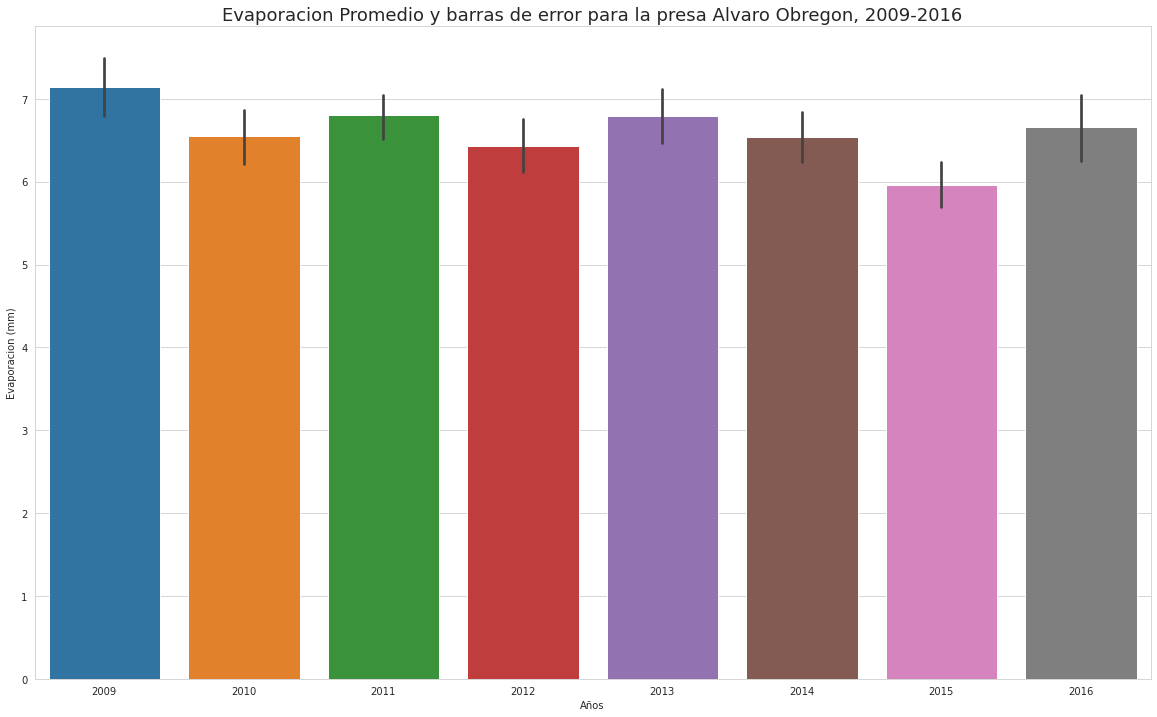

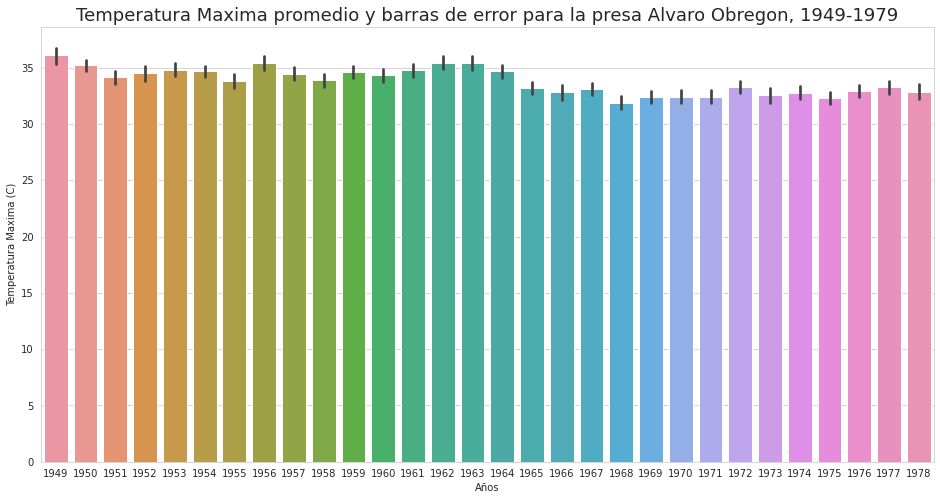

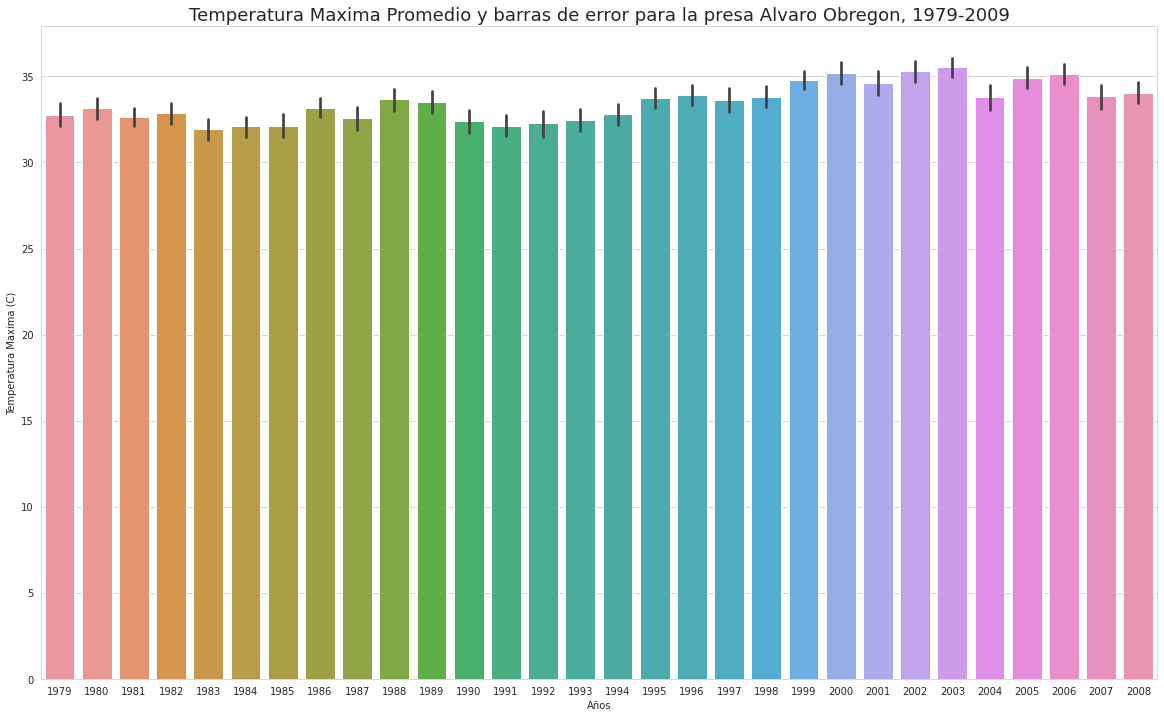

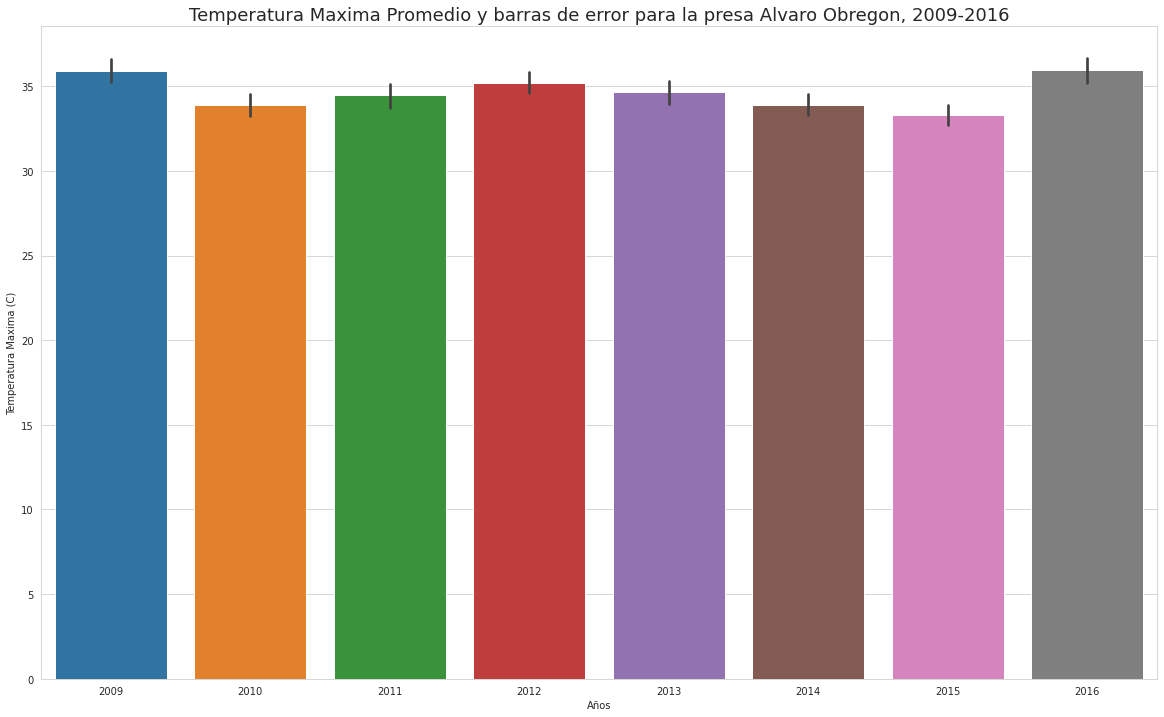

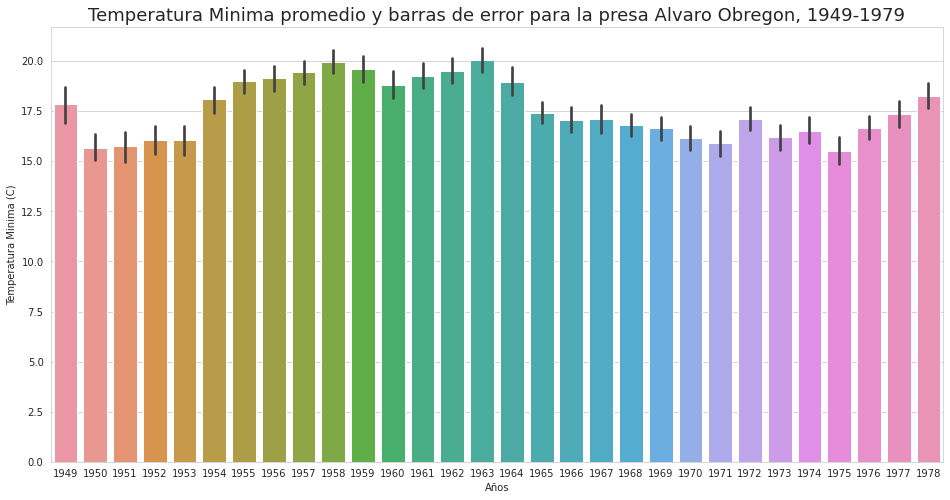

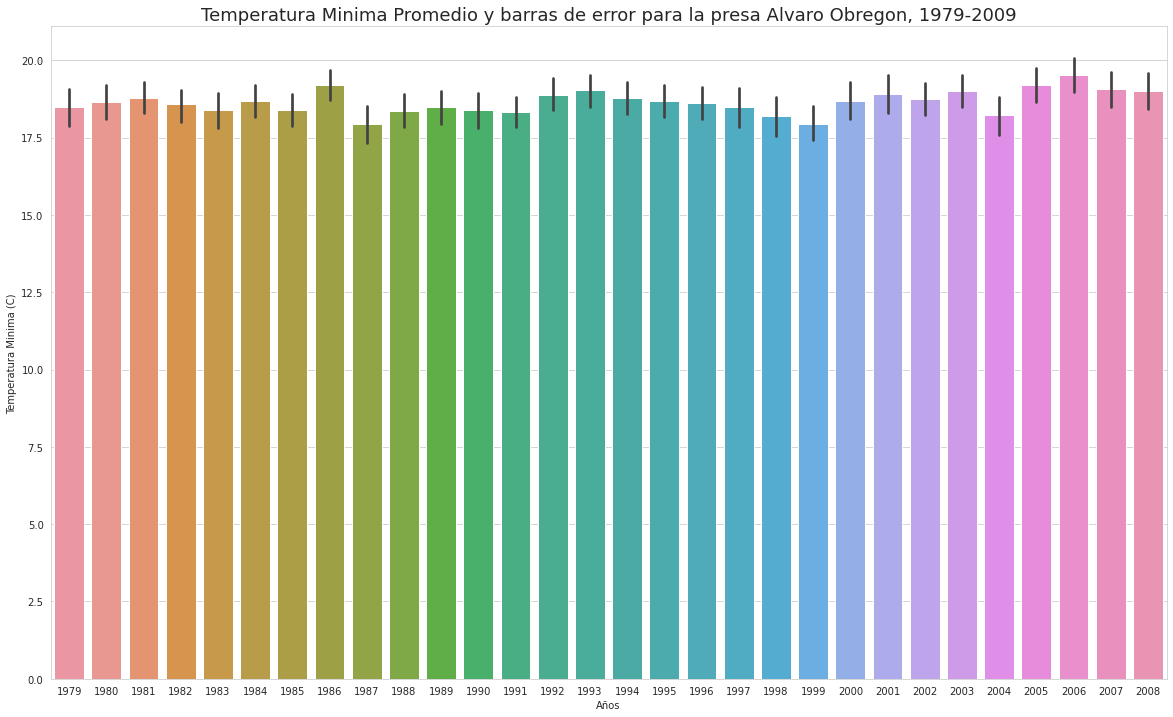

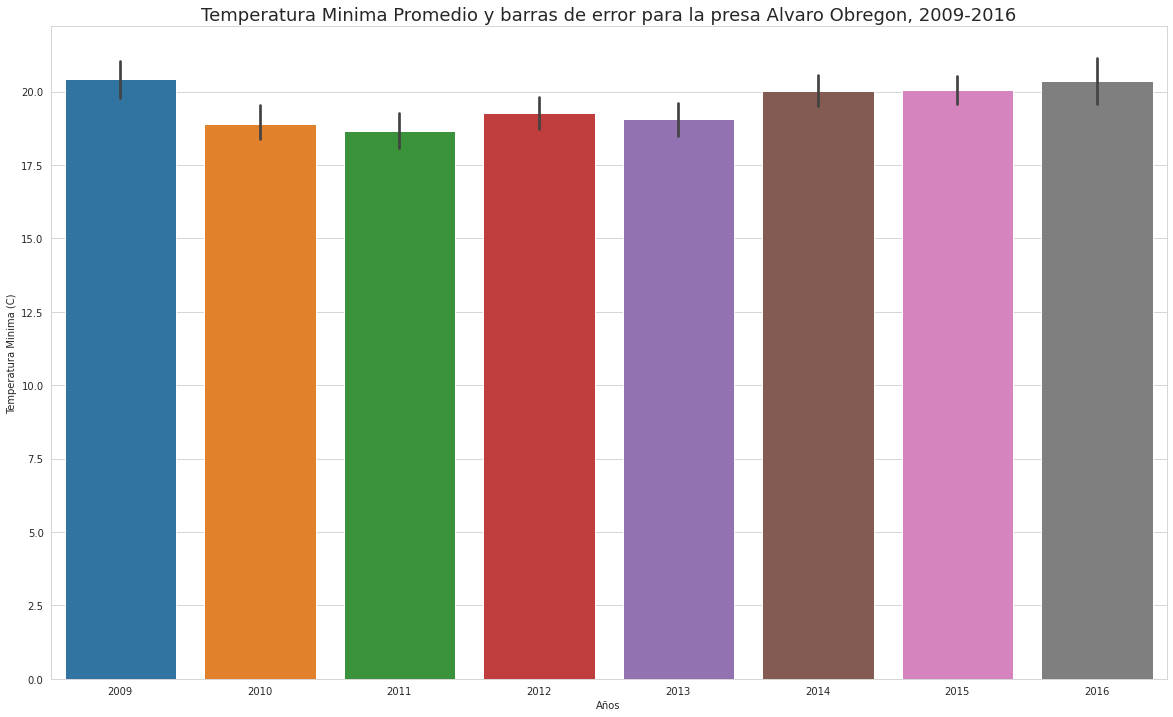

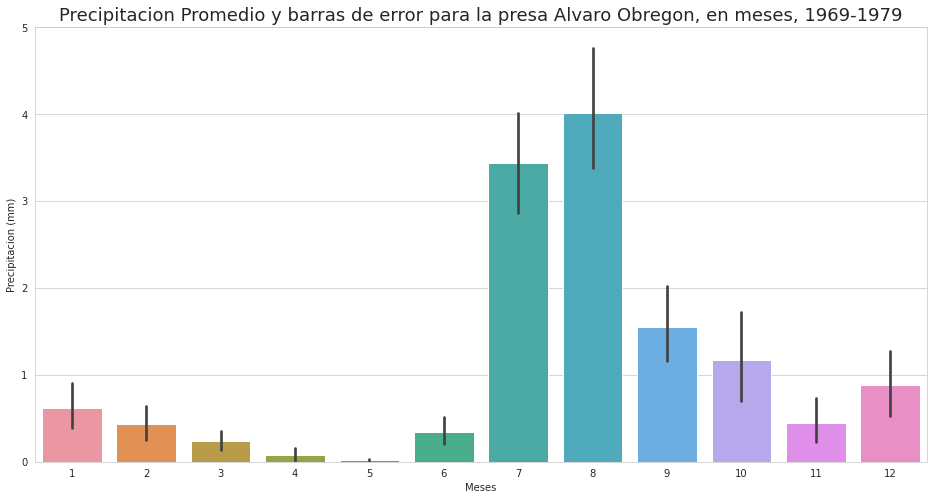

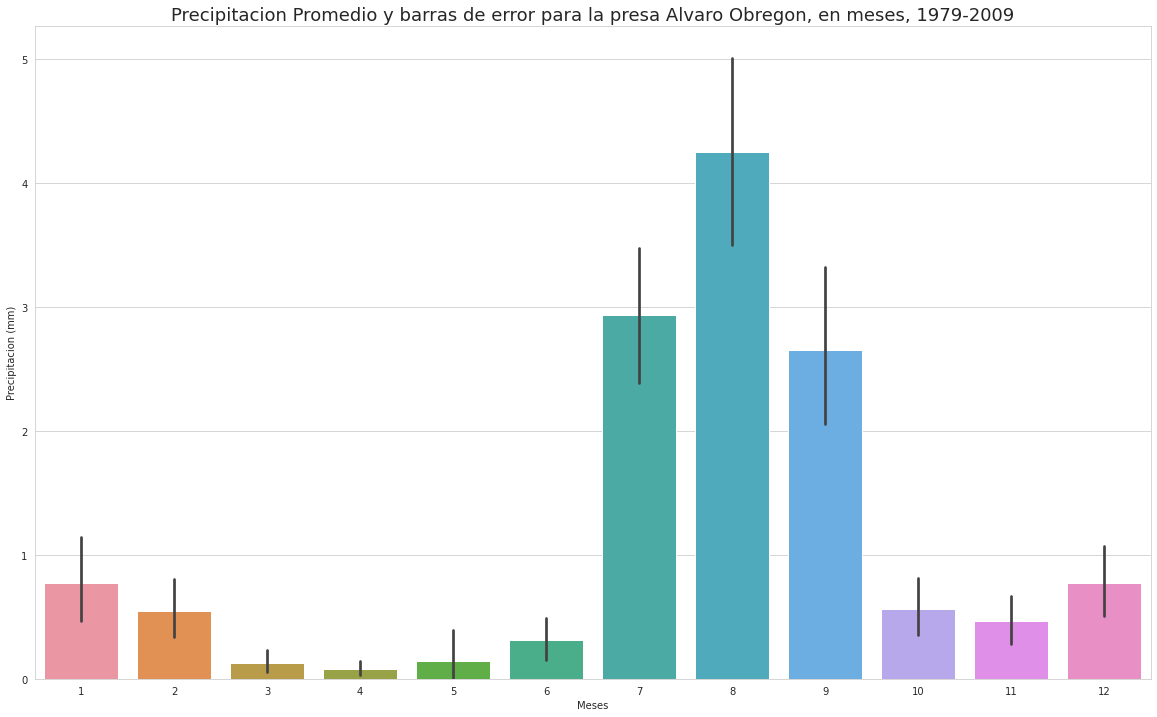

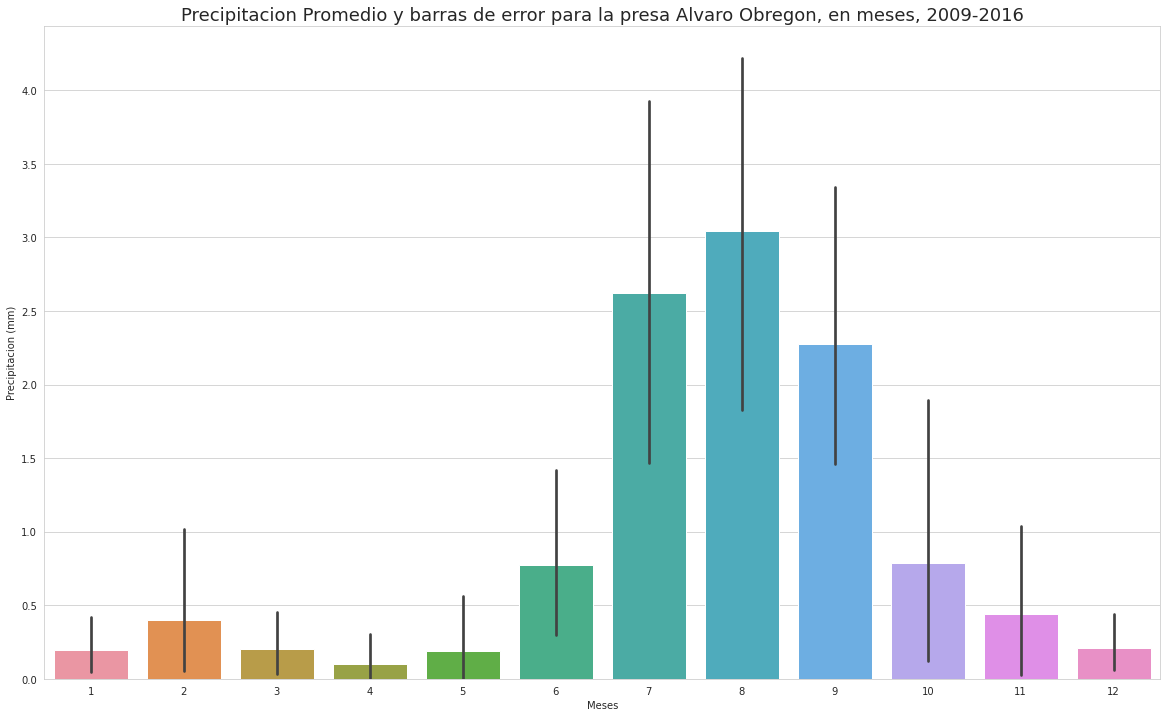

In [11]:
#========SELECCIONANDO CONJUNTO DE DATOS DE 30 AñOS============
df_30=df_datclim3[(df_datclim3['Año']>=1949)&(df_datclim3['Año']<1979)]
df_60=df_datclim3[(df_datclim3['Año']>=1979)&(df_datclim3['Año']<2009)]
df_90=df_datclim3[(df_datclim3['Año']>=2009)&(df_datclim3['Año']<2017)] #Este ultimo intervalo es menos de 30 anos, ya que la serie de datos no alcanzaba para un tercer intervalo.

#=========GRAFICANDO LOS DF ANTES CREADOS======================

#----------PRECIPITACION------------------------------------
#-----------PERIODO 1949-1979-------------------------------

sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

PrecipBar30=sns.barplot(x='Año', y='PRECIP', data=df_30);
#Rotamos 45º los Años en el eje x para mejor lectura
#f.set_xticklabels(f.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitacion (mm)')
plt.title('Precipitacion Promedio y barras de error para la presa Alvaro Obregon, 1969-1979', fontsize=18)

plt.show()

#----------PERIODO 1979-2009--------------------------
sns.set_style('whitegrid')
plt.figure(figsize=(20,12))

PrecipBar60=sns.barplot(x='Año', y='PRECIP', data=df_60);
#Rotamos 45º los Años en el eje x para mejor lectura
#f.set_xticklabels(f.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitacion (mm)')
plt.title('Precipitacion Promedio y barras de error para la presa Alvaro Obregon, 1979-2009', fontsize=18)

plt.show()

#----------PERIODO 2009-2016--------------------------
sns.set_style('whitegrid')
plt.figure(figsize=(20,12))

PrecipBar90=sns.barplot(x='Año', y='PRECIP', data=df_90);
#Rotamos 45º los Años en el eje x para mejor lectura
#f.set_xticklabels(f.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitacion (mm)')
plt.title('Precipitacion Promedio y barras de error para la presa Alvaro Obregon, 2009-2016', fontsize=18)

plt.show()


#----------EVAPORACION------------------------------------
#-----------PERIODO 1949-1979-------------------------------

sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

EvapBar30=sns.barplot(x='Año', y='EVAP', data=df_30);
#Rotamos 45º los Años en el eje x para mejor lectura
#f.set_xticklabels(f.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Evaporacion (mm)')
plt.title('Evaporacion Promedio y barras de error para la presa Alvaro Obregon, 1949-1979', fontsize=18)

plt.show()

#----------PERIODO 1979-2009--------------------------
sns.set_style('whitegrid')
plt.figure(figsize=(20,12))

EvapBar60=sns.barplot(x='Año', y='EVAP', data=df_60);
#Rotamos 45º los Años en el eje x para mejor lectura
#f.set_xticklabels(f.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Evaporacion (mm)')
plt.title('Evaporacion Promedio y barras de error para la presa Alvaro Obregon, 1979-2009', fontsize=18)

plt.show()

#----------PERIODO 2009-2016--------------------------
sns.set_style('whitegrid')
plt.figure(figsize=(20,12))

EvapBar90=sns.barplot(x='Año', y='EVAP', data=df_90);
#Rotamos 45º los Años en el eje x para mejor lectura
#f.set_xticklabels(f.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Evaporacion (mm)')
plt.title('Evaporacion Promedio y barras de error para la presa Alvaro Obregon, 2009-2016', fontsize=18)

plt.show()

#----------TEMPERATURA MAXIMA------------------------------------
#-----------PERIODO 1949-1979-------------------------------

sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

TMaxBar30=sns.barplot(x='Año', y='TMax', data=df_30);
#Rotamos 45º los Años en el eje x para mejor lectura
#f.set_xticklabels(f.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Temperatura Maxima (C)')
plt.title('Temperatura Maxima promedio y barras de error para la presa Alvaro Obregon, 1949-1979', fontsize=18)

plt.show()

#----------PERIODO 1979-2009--------------------------
sns.set_style('whitegrid')
plt.figure(figsize=(20,12))

TMaxBar60=sns.barplot(x='Año', y='TMax', data=df_60);
#Rotamos 45º los Años en el eje x para mejor lectura
#f.set_xticklabels(f.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Temperatura Maxima (C)')
plt.title('Temperatura Maxima Promedio y barras de error para la presa Alvaro Obregon, 1979-2009', fontsize=18)

plt.show()

#----------PERIODO 2009-2016--------------------------
sns.set_style('whitegrid')
plt.figure(figsize=(20,12))

TMaxBar90=sns.barplot(x='Año', y='TMax', data=df_90);
#Rotamos 45º los Años en el eje x para mejor lectura
#f.set_xticklabels(f.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Temperatura Maxima (C)')
plt.title('Temperatura Maxima Promedio y barras de error para la presa Alvaro Obregon, 2009-2016', fontsize=18)

plt.show()

#----------TEMPERATURA MINIMA------------------------------------
#-----------PERIODO 1949-1979-------------------------------

sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

TMinBar30=sns.barplot(x='Año', y='TMin', data=df_30);
#Rotamos 45º los Años en el eje x para mejor lectura
#f.set_xticklabels(f.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Temperatura Minima (C)')
plt.title('Temperatura Minima promedio y barras de error para la presa Alvaro Obregon, 1949-1979', fontsize=18)

plt.show()

#----------PERIODO 1979-2009--------------------------
sns.set_style('whitegrid')
plt.figure(figsize=(20,12))

TMinBar60=sns.barplot(x='Año', y='TMin', data=df_60);
#Rotamos 45º los Años en el eje x para mejor lectura
#f.set_xticklabels(f.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Temperatura Minima (C)')
plt.title('Temperatura Minima Promedio y barras de error para la presa Alvaro Obregon, 1979-2009', fontsize=18)

plt.show()

#----------PERIODO 2009-2016--------------------------
sns.set_style('whitegrid')
plt.figure(figsize=(20,12))

TMinBar90=sns.barplot(x='Año', y='TMin', data=df_90);
#Rotamos 45º los Años en el eje x para mejor lectura
#f.set_xticklabels(f.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Temperatura Minima (C)')
plt.title('Temperatura Minima Promedio y barras de error para la presa Alvaro Obregon, 2009-2016', fontsize=18)

plt.show()




#===========AGRUPANDO POR MESES==============
#Para esta seccion, solo analizaremos la variable "Precipitacion", ya que es mucho trabajo y poco tiempo.

#-----------PERIODO 1949-1979-------------------------------

sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

PrecipBarMes30=sns.barplot(x='Mes', y='PRECIP', data=df_30);
#Rotamos 45º los Años en el eje x para mejor lectura
#f.set_xticklabels(f.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Precipitacion (mm)')
plt.title('Precipitacion Promedio y barras de error para la presa Alvaro Obregon, en meses, 1969-1979', fontsize=18)

plt.show()

#----------PERIODO 1979-2009--------------------------
sns.set_style('whitegrid')
plt.figure(figsize=(20,12))

PrecipBarMes60=sns.barplot(x='Mes', y='PRECIP', data=df_60);
#Rotamos 45º los Años en el eje x para mejor lectura
#f.set_xticklabels(f.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Precipitacion (mm)')
plt.title('Precipitacion Promedio y barras de error para la presa Alvaro Obregon, en meses, 1979-2009', fontsize=18)

plt.show()

#----------PERIODO 2009-2016--------------------------
sns.set_style('whitegrid')
plt.figure(figsize=(20,12))

PrecipBarMes90=sns.barplot(x='Mes', y='PRECIP', data=df_90);
#Rotamos 45º los Años en el eje x para mejor lectura
#f.set_xticklabels(f.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Precipitacion (mm)')
plt.title('Precipitacion Promedio y barras de error para la presa Alvaro Obregon, en meses, 2009-2016', fontsize=18)

plt.show()




# $\underline{\text{Grafica de datos con lineas}}$

Ahora graficaremos los periodos en graficas de lineas.

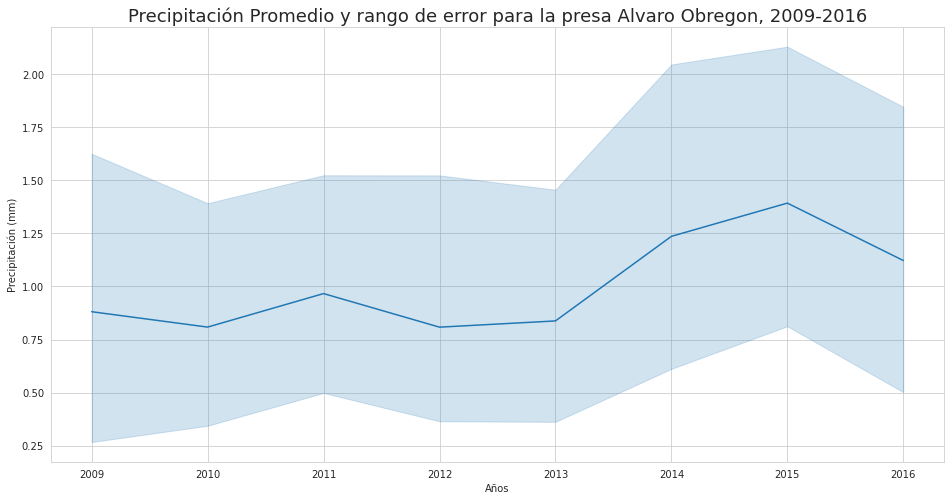

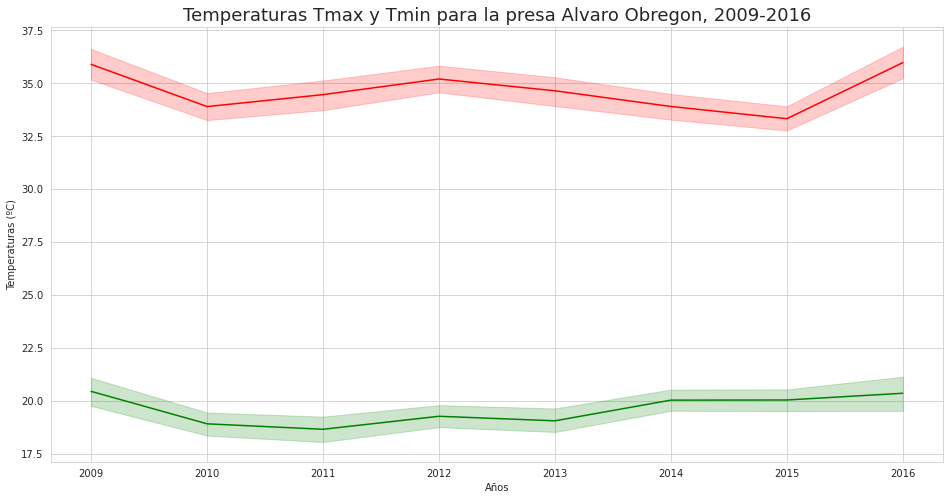

In [82]:
#=============PRECIPITACION====================
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

PrecipLin90=sns.lineplot(x='Año', y='PRECIP', data=df_90);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y rango de error para la presa Alvaro Obregon, 2009-2016', fontsize=18)

plt.show()

#================TEMPERATURAS===================

sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

sns.lineplot(x='Año', y='TMax', data=df_90, color='r');
sns.lineplot(x='Año', y='TMin', data=df_90, color='g');

plt.xlabel('Años')
plt.ylabel('Temperaturas (ºC)')
plt.title('Temperaturas Tmax y Tmin para la presa Alvaro Obregon, 2009-2016', fontsize=18)

plt.show()

# $\underline{\text{Graficas de Boxplot agrupadas por mes}}$

Ahora vamos a hacer graficas de Boxplot o de cajas, agrupando los datos por mes.

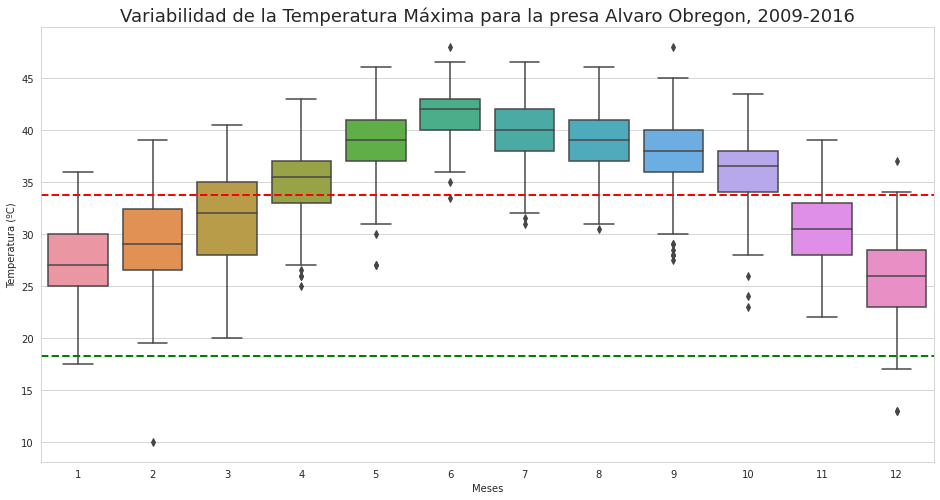

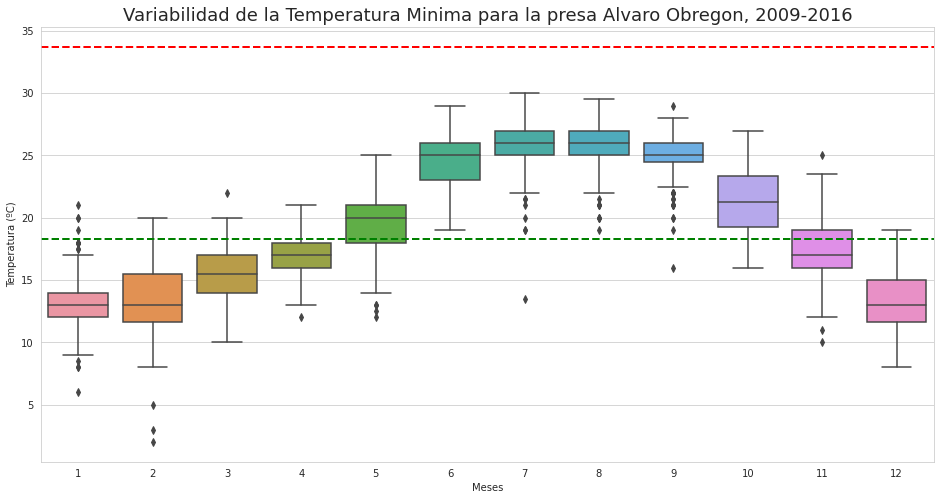

prom(TMax) =  33.732981649493
prom(TMin) =  18.27804097048319
Dif TMax_prom-TMin_prom =  15.454940679009809


In [7]:
#=============TEMPERATURAS================
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de TMax y TMin
TMax_prom = df_datclim3.TMax.mean()
TMin_prom = df_datclim3.TMin.mean()

# Gráfica de cajas de la Temperatura Maxima
TMaxBox90=sns.boxplot(x='Mes', y='TMax', data=df_90);
# Linea de T promedio 
plt.axhline(TMax_prom, color = 'r', linestyle='--', linewidth=2);
plt.axhline(TMin_prom, color = 'g', linestyle='--', linewidth=2);

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Máxima para la presa Alvaro Obregon, 2009-2016', fontsize=18)

plt.show()


sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Gráfica de cajas de la Temperatura Minima
TMinBox90=sns.boxplot(x='Mes', y='TMin', data=df_90);
# Linea de T promedio 
plt.axhline(TMax_prom, color = 'r', linestyle='--', linewidth=2);
plt.axhline(TMin_prom, color = 'g', linestyle='--', linewidth=2);

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Minima para la presa Alvaro Obregon, 2009-2016', fontsize=18)

plt.show()





# Imprimir información de Temperaturas
print('prom(TMax) = ', TMax_prom)
print('prom(TMin) = ', TMin_prom)
print('Dif TMax_prom-TMin_prom = ', (TMax_prom - TMin_prom))




